## Сборный проект 2

### Цель проекта
Целью данного проекта является анализ поведения пользователей мобильного приложения стартапа по продаже продуктов питания. Необходимо изучить воронку продаж и провести A/A/B-тестирование, чтобы понять, как изменение шрифтов в приложении влияет на пользователей.

### Задачи проекта
1. Изучить и визуализировать воронку продаж, выявить ключевые этапы, на которых пользователи теряются.
2. Провести анализ A/A/B-эксперимента для оценки влияния новых шрифтов на поведение пользователей.
3. Сравнить контрольные группы между собой, чтобы проверить корректность эксперимента.
4. Сравнить экспериментальную группу с контрольными группами и сделать выводы о влиянии изменения шрифтов.

### Описание проекта
Проект состоит из нескольких этапов. Сначала мы проанализируем общие данные, чтобы понять структуру и полноту данных. Затем, проведем анализ воронки продаж для выявления ключевых этапов, где пользователи могут "застревать". После этого мы изучим результаты A/A/B-эксперимента, чтобы определить, как новые шрифты влияют на поведение пользователей. Важной частью анализа будет проверка корректности эксперимента путем сравнения двух контрольных групп.

### Содержание проекта
1. **Общая информация о данных**
   - Изучение файла с данными.
   - Подготовка данных: замена названий столбцов, проверка пропусков и типов данных.
   - Добавление столбцов даты и времени.

2. **Анализ данных**
   - Подсчет общего количества событий и пользователей.
   - Анализ среднего числа событий на пользователя.
   - Определение временного диапазона данных.
   - Анализ полноты данных и исключение неполных данных.
   - Проверка наличия пользователей из всех экспериментальных групп.

3. **Изучение воронки событий**
   - Анализ и сортировка событий по частоте и числу пользователей.
   - Построение последовательности событий.
   - Расчет долей пользователей, проходящих через каждый этап воронки.
   - Выявление этапов, на которых теряется наибольшее число пользователей.

4. **Анализ A/A/B-эксперимента**
   - Подсчет числа пользователей в каждой экспериментальной группе.
   - Проверка корректности эксперимента путем сравнения контрольных групп.
   - Сравнение экспериментальной группы с контрольными группами.
   - Анализ статистической значимости различий между группами.

5. **Выводы и рекомендации**
   - Определение влияния изменения шрифтов на поведение пользователей.
   - Рекомендации по дальнейшим действиям на основе полученных данных и результатов анализа.

### Описание данных
Данные включают информацию о действиях пользователей в мобильном приложении:
- `event_name` — название события;
- `device_id_hash` — уникальный идентификатор пользователя;
- `event_timestamp` — время события;
- `exp_id` — номер эксперимента: 246 и 247 — контрольные группы, 248 — экспериментальная.

## Подготовка данных

### Изучение файла с данными

In [29]:
#импортируем основные библиотеки, с которыми будем работать
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from scipy import stats as st
import math as mth
from plotly import graph_objects as go

In [30]:
events = pd.read_csv('/datasets/logs_exp.csv', sep='\t')
display(events.head())
display(events.info())

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


None

Как мы видим, датафрейм состоит из четырех столбцов с информацией о событиях, пользователях, датах и номерах групп. 
Из некритичного - **следует изменить название столбцов** на змеиный регистр для более удобной работы.
Также нужно обязательно **создать столбец с привычным форматом даты**, так как информация в датафрейме указана в целочисленном типе и, скорее всего, в секундах. 
Будем с этим работать. 

### Подготовка данных

In [31]:
#изменим названия столбцов
events.rename(columns={
    'EventName': 'event_name',
    'DeviceIDHash': 'device_id_hash',
    'EventTimestamp': 'event_timestamp',
    'ExpId': 'exp_id'
}, inplace=True)

display(events.head())

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [32]:
#проверим на пропуски и дубликаты 
print('Пропущенные значения в каждом столбце:',events.isna().sum())
print('Дубликатов найдено:',events.duplicated().sum())
print('Доля дубликатов в датафрейме:',round(events.duplicated().sum() / len(events),4))

Пропущенные значения в каждом столбце: event_name         0
device_id_hash     0
event_timestamp    0
exp_id             0
dtype: int64
Дубликатов найдено: 413
Доля дубликатов в датафрейме: 0.0017


Как мы видим, пропущенных значений в каждом из столбцов не найдено, а вот польностью дублирующихся строк найдено 413. Общая доля дубликатов в датафрейме меньше 1%, а точнее 0.17%, что можно считать незначительным. Удалим их.

In [33]:
events.drop_duplicates(inplace=True)
print('Дубликатов найдено:',events.duplicated().sum())

Дубликатов найдено: 0


### Добавление столбцов даты и времени.

In [34]:
#добавим новые столбцы к существующему датафрейму
events['event_datetime'] = pd.to_datetime(events['event_timestamp'], unit='s')
events['event_date'] = events['event_datetime'].dt.date

display(events.head())

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


К существующему датафрейму присоединили новые столбцы с датой и временем и датой для большего удобства. Перейдём к следующему шагу.

## Изучение и проверка данных

### Общее количество событий в логе

In [35]:
num_events = events.shape[0]
print(f'Количество событий в логе: {num_events}')
print(events['event_name'].value_counts())

Количество событий в логе: 243713
MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event_name, dtype: int64


### Общее количество пользователей

In [36]:
num_users = events['device_id_hash'].nunique()

print(f'Количество уникальных пользователей в логе: {num_users}')

Количество уникальных пользователей в логе: 7551


### Среднее количество событий на пользователя

In [37]:
avg_events_per_user = num_events / num_users

print(f"Среднее количество событий на пользователя: {avg_events_per_user:.2f}")

Среднее количество событий на пользователя: 32.28


Также следует посчитать медиану на случай, если выбросов много.

In [38]:
events_per_user = events.groupby('device_id_hash')['event_name'].count()
events_per_user.describe()

count    7551.000000
mean       32.275593
std        65.154219
min         1.000000
25%         9.000000
50%        20.000000
75%        37.000000
max      2307.000000
Name: event_name, dtype: float64

Как мы видим из информации о сгруппированном датафрейме с количеством событий на каждого пользователя - медиана составляет 20 событий на пользователя. А максимальное значение достигает 2307 событий на пользователя - это может значительно увеличить среднее, поэтому в данном случае лучше использовать медиану.

### Изучение дат проведения теста

In [39]:
# Определение минимальной и максимальной даты
min_date = events['event_datetime'].min()
max_date = events['event_datetime'].max()

print(f"Минимальная дата: {min_date}")
print(f"Максимальная дата: {max_date}")

Минимальная дата: 2019-07-25 04:43:36
Максимальная дата: 2019-08-07 21:15:17


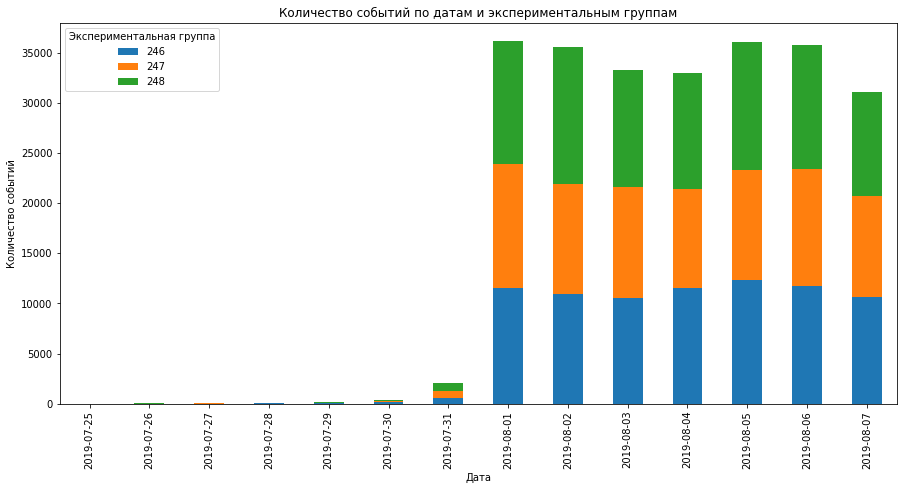

In [40]:
grouped_events = events.groupby(['event_date', 'exp_id']).size().unstack(fill_value=0)

grouped_events.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Количество событий по датам и экспериментальным группам')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.legend(title='Экспериментальная группа')
plt.show()

Как видно из графика - в первой неделе эксперимента довольно маленькое количество событий, скорее всего данные по этим дням неполные и их можно не учитывать в эксперименте. Зададим рамки после удаления старых данных.

In [41]:
# Анализ полноты данных
daily_event_counts = events.groupby('event_date').size()
print('Количество событий по дням:\n',daily_event_counts)

# Определение даты, с которой данные полные
full_data_start_date = '2019-08-01'
full_data_start_date = pd.to_datetime(full_data_start_date)
full_data_events = events[events['event_date'] >= full_data_start_date]

# Подтверждение диапазона дат после удаления старых данных
full_min_date = full_data_events['event_datetime'].min()
full_max_date = full_data_events['event_datetime'].max()

print(f"Данные после удаления старых: от {full_min_date} до {full_max_date}")

Количество событий по дням:
 event_date
2019-07-25        9
2019-07-26       31
2019-07-27       55
2019-07-28      105
2019-07-29      184
2019-07-30      412
2019-07-31     2030
2019-08-01    36141
2019-08-02    35554
2019-08-03    33282
2019-08-04    32968
2019-08-05    36058
2019-08-06    35788
2019-08-07    31096
dtype: int64
Данные после удаления старых: от 2019-08-01 00:07:28 до 2019-08-07 21:15:17


In [42]:
# Общее количество событий до удаления старых данных
initial_num_events = events.shape[0]

# Общее количество уникальных пользователей до удаления старых данных
initial_num_users = events['device_id_hash'].nunique()

# Подсчет количества событий после удаления старых данных
final_num_events = full_data_events.shape[0]

# Подсчет количества уникальных пользователей после удаления старых данных
final_num_users = full_data_events['device_id_hash'].nunique()


# Потери событий и пользователей
lost_events = initial_num_events - final_num_events
lost_users = initial_num_users - final_num_users
share_events = lost_events / initial_num_events
share_users = lost_users / initial_num_users

print(f'Количество потерянных событий: {lost_events}', f'Доля от общего числа событий: {share_events:.4f}')
print(f'Количество потерянных пользователей: {lost_users}', f'Доля от общего числа пользователей: {share_users:.4f}')


Количество потерянных событий: 2826 Доля от общего числа событий: 0.0116
Количество потерянных пользователей: 17 Доля от общего числа пользователей: 0.0023


Итого мы потеряли 2826 событий и 17 пользователей, что составляет 1,2% от числа событий и 0,23% от числа пользователей, что незначительно.

In [43]:
# Проверка на наличие всех трёх групп 
exp_groups = full_data_events['exp_id'].unique()
print(f'Экспериментальные группы в данных: {exp_groups}')

expected_groups = {246, 247, 248}
missing_groups = expected_groups - set(exp_groups)

if not missing_groups:
    print('Все три экспериментальные группы присутствуют в данных.')
else:
    print(f'Отсутствующие группы: {missing_groups}')

Экспериментальные группы в данных: [246 247 248]
Все три экспериментальные группы присутствуют в данных.


In [44]:
# Проверка на пересечение пользователей между группами
user_group_counts = full_data_events.groupby('device_id_hash')['exp_id'].nunique()
multiple_groups_users = user_group_counts[user_group_counts > 1]

if not multiple_groups_users.empty:
    print(f'Пользователи, присутствующие в нескольких группах: {multiple_groups_users.index.tolist()}')
    print(f'Количество таких пользователей: {multiple_groups_users.count()}')
else:
    print('Пересечения пользователей между группами не обнаружено.')

Пересечения пользователей между группами не обнаружено.


**Промежуточный итог:** Мы определили общее количество событий и пользователей в логе 243713 и 7551 соответственно. Также мы посчитали среднее число событий на пользователя и выяснили, что из за наличия выбросов для подсчёта истинного среднего лучше использовать медиану, так как не неё не влияют выбросы. Также мы выяснили минимальную и максимальную дату проведения эксперимента (25 июля и 7 августа). Из-за малого количества данных в июле было принято решение удалить данные о событиях в июля и для дальнейшего анализа использовать данные из августа. Проведённые проверки о наличии групп в эксперименте показали, что пользователи из всех трёх групп присутствуют в новом датафрейме.

## Изучение воронки событий

### Какие события есть в логах

In [45]:
event_counts = full_data_events['event_name'].value_counts()

sorted_event_counts = event_counts.sort_values(ascending=False)

print("События в логах и их частота:\n",sorted_event_counts)

События в логах и их частота:
 MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64


Событие отображения главного экрана происходит наиболее часто, с 117328 записями. Это логично, так как главный экран обычно является первой точкой входа для пользователей в приложении.

Отображение экрана предложений произошло 46333 раза. Это событие значительно реже, чем отображение главного экрана, но все еще имеет высокую частоту, указывая на интерес пользователей к специальным предложениям или скидкам.

Событие отображения экрана корзины зарегистрировано 42303 раза. Это показывает, что значительное число пользователей добавляет товары в корзину и переходит к следующему шагу процесса покупки.

Успешное завершение платежа зарегистрировано 33918 раз. Это событие показывает количество успешных покупок и является важным индикатором конверсии пользователей от просмотра товаров до их покупки.

Событие прохождения обучающего материала произошло 1005 раз. Это наименее частое событие, что может указывать на низкую потребность в обучении для пользователей или на то, что пользователи пропускают этот шаг.

### Сколько пользователей совершали эти события

In [46]:
# Подсчет количества уникальных пользователей для каждого типа события
unique_users_per_event = full_data_events.groupby('event_name')['device_id_hash'].nunique()

# Общее количество уникальных пользователей в логе
total_unique_users = full_data_events['device_id_hash'].nunique()

# Расчет доли пользователей, которые хоть раз совершали каждое событие
user_event_ratio = round(unique_users_per_event / total_unique_users, 2)

# Создание датафрейма для удобства отображения
event_analysis = pd.DataFrame({
    'unique_users': unique_users_per_event,
    'user_event_ratio': user_event_ratio
})

# Сортировка событий по числу уникальных пользователей
event_analysis_sorted = event_analysis.sort_values(by='unique_users', ascending=False)

# Вывод результата
display(event_analysis_sorted)

,unique_users,user_event_ratio
event_name,,
MainScreenAppear,7419,0.98
OffersScreenAppear,4593,0.61
CartScreenAppear,3734,0.50
PaymentScreenSuccessful,3539,0.47
Tutorial,840,0.11


Как мы видим, воронка количества событий и количества уникальных пользователей по событиям мало чем отличается - 98% уникальных пользователей как минимум заходили на главную страницу, 61% столкнулся с экраном предложения, 50% пользователей переходили в карзину и 47% покупали товар - конверсия в покупку 47% довольно высокая. Стоит также отметить, что обучение прошли всего лишь 11% всех пользователей, что может говорить о низкой потребности пользователей в обучении.

### Последовательность событий 

**Предполагаемый порядок событий**

На основе частоты событий и числа уникальных пользователей, совершивших эти события, можно предположить следующий порядок событий в приложении:

1. **MainScreenAppear**: первое событие, которое видит пользователь после запуска приложения, - отображение главного экрана. Это логично, так как большинство пользователей начинает взаимодействие с приложения с главного экрана.

2. **OffersScreenAppear**: после главного экрана пользователи могут перейти к экрану с предложениями, чтобы просмотреть доступные скидки и акции.

3. **CartScreenAppear**: следующим шагом после просмотра предложений пользователи могут добавить товары в корзину, что приводит к отображению экрана корзины.

4. **PaymentScreenSuccessful**: после добавления товаров в корзину пользователи переходят к оплате. Успешное завершение платежа регистрируется как событие "PaymentScreenSuccessful".

5. **Tutorial**: это событие происходит редко, предположительно, в начале использования приложения новым пользователем. Оно может не быть частью основной последовательности взаимодействий большинства пользователей.

**Анализ последовательной цепочки событий**

Все перечисленные события, кроме "Tutorial", можно считать последовательной цепочкой, ведущей к завершению покупки:

1. **MainScreenAppear** → 2. **OffersScreenAppear** → 3. **CartScreenAppear** → 4. **PaymentScreenSuccessful**

Событие "Tutorial" не является частью основной воронки, поскольку оно происходит редко и не обязательно в строгой последовательности с другими событиями.

**Вывод**

**События, которые нужно учитывать при расчёте воронки продаж:**
- MainScreenAppear
- OffersScreenAppear
- CartScreenAppear
- PaymentScreenSuccessful

**Событие, которое не нужно учитывать при расчёте воронки:**
- Tutorial

### Доля пользователей на каждом шагу воронки

In [47]:
# Подсчет количества уникальных пользователей для каждого типа события
unique_users_per_event = full_data_events.groupby('event_name')['device_id_hash'].nunique()

# Определение последовательности событий
event_sequence = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Фильтрация и сортировка событий
unique_users_per_event = unique_users_per_event[event_sequence]

# Расчет долей перехода на следующий шаг с использованием функции shift()
conversion_rates = unique_users_per_event.shift(-1) / unique_users_per_event

# Извлечение количества пользователей для каждого события
main_screen_users = unique_users_per_event['MainScreenAppear']
offers_screen_users = unique_users_per_event['OffersScreenAppear']
cart_screen_users = unique_users_per_event['CartScreenAppear']
payment_success_users = unique_users_per_event['PaymentScreenSuccessful']

# Расчет долей перехода на следующий шаг
offers_to_main_ratio = conversion_rates['MainScreenAppear']
cart_to_offers_ratio = conversion_rates['OffersScreenAppear']
payment_to_cart_ratio = conversion_rates['CartScreenAppear']

# Вывод результатов
print(f'Доля пользователей, переходящих с MainScreenAppear на OffersScreenAppear: {offers_to_main_ratio:.2f}')
print(f'Доля пользователей, переходящих с OffersScreenAppear на CartScreenAppear: {cart_to_offers_ratio:.2f}')
print(f'Доля пользователей, переходящих с CartScreenAppear на PaymentScreenSuccessful: {payment_to_cart_ratio:.2f}')

Доля пользователей, переходящих с MainScreenAppear на OffersScreenAppear: 0.62
Доля пользователей, переходящих с OffersScreenAppear на CartScreenAppear: 0.81
Доля пользователей, переходящих с CartScreenAppear на PaymentScreenSuccessful: 0.95


### На каком шаге теряется больше всего пользователей

In [48]:
loss_ratios = {
    'MainScreenAppear to OffersScreenAppear': 1 - offers_to_main_ratio,
    'OffersScreenAppear to CartScreenAppear': 1 - cart_to_offers_ratio,
    'CartScreenAppear to PaymentScreenSuccessful': 1 - payment_to_cart_ratio
}

max_loss_step = max(loss_ratios, key=loss_ratios.get)
max_loss_value = loss_ratios[max_loss_step]


print(f"Наибольшие потери пользователей происходят на этапе: {max_loss_step} с потерей {max_loss_value:.2f}")

Наибольшие потери пользователей происходят на этапе: MainScreenAppear to OffersScreenAppear с потерей 0.38


### Сколько всего пользователей доходит до оплаты

In [49]:
first_to_last_ratio = payment_success_users / main_screen_users
print(f"Доля пользователей, доходящих от первого события до оплаты: {first_to_last_ratio:.2f}")

Доля пользователей, доходящих от первого события до оплаты: 0.48


Для наглядности построим график, на котором можно будет увидеть воронку.

In [50]:
unique_users_per_event = unique_users_per_event.reset_index()
unique_users_per_event.columns = ['event_name', 'unique_users']

fig = go.Figure(go.Funnel(
    y=unique_users_per_event['event_name'],
    x=unique_users_per_event['unique_users'],
    textinfo='value+percent initial'))

fig.update_layout(title="Воронка событий по количеству пользователей")
fig.show()

**Выводы**

* Воронка событий выглядит следующим образом  **MainScreenAppear** → **OffersScreenAppear** →  **CartScreenAppear** → **PaymentScreenSuccessful**
* Событие "Tutorial" не является частью основной воронки, поскольку оно происходит редко и не обязательно в строгой последовательности с другими событиями.

* Доля пользователей, переходящих с MainScreenAppear на OffersScreenAppear: 0.62, доля пользователей, переходящих с OffersScreenAppear на CartScreenAppear: 0.81, доля пользователей, переходящих с CartScreenAppear на PaymentScreenSuccessful: 0.95

* Наибольшие потери пользователей происходят на этапе MainScreenAppear и OffersScreenAppear с потерей 0.38

## Изучение результатов эксперимента

### Количество пользователей в каждой экспериментальной группе 

In [51]:
users_by_group = full_data_events.groupby('exp_id')['device_id_hash'].nunique()
users_by_group['combined_control_group'] = users_by_group[246] + users_by_group[247]
print(users_by_group)

exp_id
246                       2484
247                       2513
248                       2537
combined_control_group    4997
Name: device_id_hash, dtype: int64


Группы разделены почти поровну, численность каждой группы около 2.5 тысяч пользователей.

### A/A-тест

Подготовим данные для тестов.

In [52]:
event_group_test = full_data_events[full_data_events['event_name']!='Tutorial'].pivot_table(
    index='event_name', 
    columns='exp_id', 
    values='device_id_hash',
    aggfunc='nunique').sort_values(by=246, ascending=False)

event_group_test = event_group_test.reset_index()
event_group_test['combined_control_group'] = event_group_test[246] + event_group_test[247]
event_group_test['all'] = event_group_test['combined_control_group'] + event_group_test[248]

event_group_test['share_246'] = round((event_group_test[246] / users_by_group[246] * 100),2)
event_group_test['share_247'] = round((event_group_test[247] / users_by_group[247] * 100),2)
event_group_test['share_248'] = round((event_group_test[248] / users_by_group[248] * 100),2)
display(event_group_test)

exp_id,event_name,246,247,248,combined_control_group,all,share_246,share_247,share_248
0,MainScreenAppear,2450,2476,2493,4926,7419,98.63,98.53,98.27
1,OffersScreenAppear,1542,1520,1531,3062,4593,62.08,60.49,60.35
2,CartScreenAppear,1266,1238,1230,2504,3734,50.97,49.26,48.48
3,PaymentScreenSuccessful,1200,1158,1181,2358,3539,48.31,46.08,46.55


Проведем статистические тесты, за основу я взял t-критерий Стьюдента. В качестве уровня статистической значимости возьмем 1%, так как чтобы сравнить две контрольные группы важна точность и "ложные срабатывания" недопустимы, из за этого увеличивается ошибка второго рода (принятие ложной нулевой гипотезы), поэтому количество экспериментов может увеличится.

In [53]:
def z_test(group1, group2, alpha):
    for i in event_group_test.index:
        p1 = event_group_test[group1][i] / users_by_group[group1]
        p2 = event_group_test[group2][i] / users_by_group[group2]
        p_combined = ((event_group_test[group1][i] + event_group_test[group2][i]) / 
                      (users_by_group[group1] + users_by_group[group2]))
        difference = p1 - p2
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * 
                                        (1/users_by_group[group1] + 1/users_by_group[group2]))
        distr = st.norm(0, 1) 
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('{} p-значение: {}'.format(event_group_test['event_name'][i], p_value))
        if (p_value < alpha):
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        else:
            print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
        print('')
        
        
        
        
z_test(246, 247, 0.01)


MainScreenAppear p-значение: 0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Как мы видим, обе группы по всем событиям статистически значимо не отличаются - по всем событиям довольно высокий p-value. Можно сказать, что разбиение по группам работает корректно. В дальнейших экспериментах можно увеличить уровень статистической значимости, так как мы будем сравнивать не только контрольные группы, но и экспериментальные. 

### A/B-тесты

In [54]:
#сравним первую контрольную группу и экспериментальную группу
z_test(246, 248, 0.05)

MainScreenAppear p-значение: 0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [55]:
#сравним вторую контрольную группу и экспериментальную группу
z_test(247, 248, 0.05)

MainScreenAppear p-значение: 0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [56]:
#сравним объединенную контрольную группу и экспериментальную группу
z_test('combined_control_group', 248, 0.05)

MainScreenAppear p-значение: 0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Во всех тестах не было выявлено статистически значимых изменений.
Из представленных результатов можно сделать вывод, что **корректировка уровня значимости не требуется**, так как p-значения уже значительно превышают стандартный уровень значимости (у нас это 0.05). В таком случае даже после корректировки результат не изменится, поскольку значения остаются выше скорректированного уровня значимости.

## Выводы

**Изучение и проверка данных**

Мы провели детальный анализ логов событий мобильного приложения, выявив ключевые статистические показатели и особенности данных.

- **Количество уникальных пользователей в логе**: 7551
- **Среднее количество событий на пользователя**: 32.28

Однако, медиана количества событий на пользователя составляет 20, что указывает на значительное влияние выбросов на среднее значение (максимальное значение достигает 2307 событий на пользователя). Таким образом, медиана является более подходящим показателем для оценки среднего числа событий на пользователя в этом контексте.

Исследование данных показало, что в первой неделе эксперимента количество событий было незначительным, что указывает на неполноту данных за этот период. В связи с этим мы решили исключить данные первой недели из анализа.

- **Количество потерянных событий**: 2826 (1.16% от общего числа событий)
- **Количество потерянных пользователей**: 17 (0.23% от общего числа пользователей)

Потери данных оказались незначительными, что не повлияло на общую картину.

Мы определили общее количество событий и пользователей в логе (243713 и 7551 соответственно). Также было установлено, что из-за выбросов медиана является более точным показателем среднего числа событий на пользователя. Эксперимент охватывает период с 25 июля по 7 августа, однако для анализа используются только данные с августа. Проведенные проверки показали, что пользователи из всех трех экспериментальных групп присутствуют в новом датафрейме.

**Изучение воронки событий**

Мы анализировали воронку событий, начиная с главного экрана до успешного завершения платежа:

1. **MainScreenAppear**: 117328 записей
2. **OffersScreenAppear**: 46333 записей
3. **CartScreenAppear**: 42303 записей
4. **PaymentScreenSuccessful**: 33918 записей
5. **Tutorial**: 1005 записей

Анализ показал, что 98% уникальных пользователей посещают главный экран, 61% просматривают предложения, 50% добавляют товары в корзину и 47% завершают покупку. Конверсия в покупку составляет 47%, что является довольно высоким показателем.

Событие "Tutorial" не является частью основной последовательности событий, поскольку оно происходит редко и не влияет на основную воронку продаж.

- **Доля пользователей, переходящих с MainScreenAppear на OffersScreenAppear**: 62%
- **Доля пользователей, переходящих с OffersScreenAppear на CartScreenAppear**: 81%
- **Доля пользователей, переходящих с CartScreenAppear на PaymentScreenSuccessful**: 95%

Наибольшие потери пользователей происходят на этапе перехода с главного экрана на экран предложений, где теряется 38% пользователей.

**Изучение результатов эксперимента**

Мы проверили количество уникальных пользователей в каждой экспериментальной группе и объединили контрольные группы:

- **Группа 246**: 2484 пользователей
- **Группа 247**: 2513 пользователей
- **Группа 248**: 2537 пользователей
- **Объединенная контрольная группа (246+247)**: 4997 пользователей

Группы разделены почти поровну, каждая включает около 2.5 тысяч пользователей.

Для проверки корректности разбиения на группы мы провели t-тест Стьюдента с уровнем значимости 1%. Анализ показал, что между группами 246 и 247 нет статистически значимых различий по всем событиям, что свидетельствует о корректном разбиении на группы.

При проведении A/B тестов был взят уровень статистической значимости в 5%. Все тесты не показали статистически значимых изменений. Даже если бы уровень статистической значимости был бы увеличен до 10% статистически значимых изменений не было бы (кроме CartScreenAppear у 246 и 248 группы), но при увеличении уровня статистической значимости увеличивается и ошибка первого рода (неверно отвергнутая нулевая гипотеза). Поэтому лучше всего оставить уровень статистической значимости на уровне 5% и констатировать отсутствие изменений в контрольных и экспериментальной группе.
